In [7]:
#Importing Various Python modules 

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import csv
from time import sleep
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error 
%matplotlib inline

In [8]:
#Sample API for one Player
#r = requests.get('http://fantasy.premierleague.com/web/api/elements/266/')
#top = r.text    # unicode text string
#top = r.json()  # dictionary
#pprint(top)

In [9]:
#Attackers

players_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dict_output1.csv',index_col='web_name', na_filter=False)

#Observing the Data for Exploration
players_df.head()
players_df.tail()
players_df.dtypes
players_df.iloc[0,:]


transfers_out                                                              161257
yellow_cards                                                                    1
code                                                                        59936
event_total                                                                     2
goals_conceded                                                                 13
photo                                                                   59936.jpg
red_cards                                                                       0
saves                                                                          26
ep_this                                                                         4
value_form                                                                    0.7
next_fixture                                                          Man Utd (H)
team_id                                                                         1
goals_scored    

In [10]:
#Filtering the data only for Forwards
players_df[players_df.type_name=='Forward'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated.csv')

forwards_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated.csv',index_col='web_name', na_filter=False)

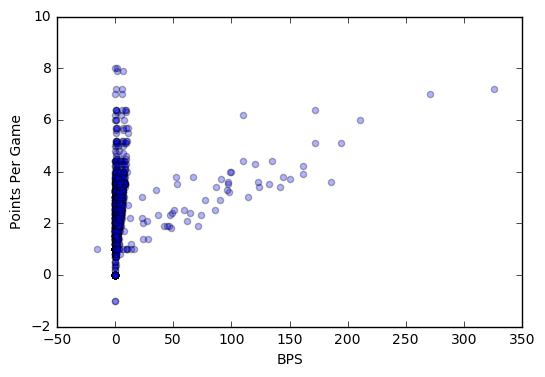

In [11]:
#Some random plotting to determine which attributes to use in the final model
# I did this step for various variables but it didn't reveal much to me.
plt.scatter(players_df.value_form, players_df.points_per_game, alpha=0.3)
plt.scatter(players_df.value_season, players_df.points_per_game, alpha=0.3) 
plt.scatter(forwards_df.bps, forwards_df.points_per_game, alpha=0.3) 
plt.xlabel("BPS")
plt.ylabel("Points Per Game")

In [12]:
#Exploring the data in the forwards data frame
forwards_df.describe()
forwards_df.head()
forwards_df.tail()
forwards_df.dtypes
forwards_df.points_per_game.describe()
forwards_df.points_per_game.value_counts()
forwards_df.isnull()

,transfers_out,yellow_cards,code,event_total,goals_conceded,photo,red_cards,saves,ep_this,value_form,...,minutes,transfers_in_event,selected_by,element_type,ep_next,team,chance_of_playing_this_round,event_points,second_name,cost_change_event
web_name,,,,,,,,,,,,,,,,,,,,,
Podolski,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Giroud,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sanogo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Akpom,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Campbell,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Agbonlahor,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Weimann,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Benteke,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Kozák,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Creating  Initial Linear Model for Forwards

forwards_model = smf.ols(formula='event_total ~ selected_by + value_form + value_season + form + ea_index + bps', data=forwards_df).fit()
forwards_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     24.95
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           6.58e-18
Time:                        19:18:27   Log-Likelihood:                -198.05
No. Observations:                 107   AIC:                             410.1
Df Residuals:                     100   BIC:                             428.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.1611      0.211      0.763      0.447        -0.258     0.580
selected_by      0.0515      0.040      1.303      0.196        -0.027     0.130
value_form       7.7187      2.432      3.174      0.002         2.893    12.544
value_season    -0.6327      0.205     -3.085      0.003        -1.040    -0.226
form            -0.2276      0.380     -0.600      0.550        -0.981     0.526
ea_index         0.0145      0.010      1.522      0.131        -0.004     0.033
bps              0.0060      0.012      0.507      0.613        -0.017     0.029
==============================================================================
Omnibus:                       69.586   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.303
Skew:                           2.155   Prob(JB):                     7.12e-83
Kurtosis:                      11.141   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c1d26d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11da9e978>]], dtype=object)

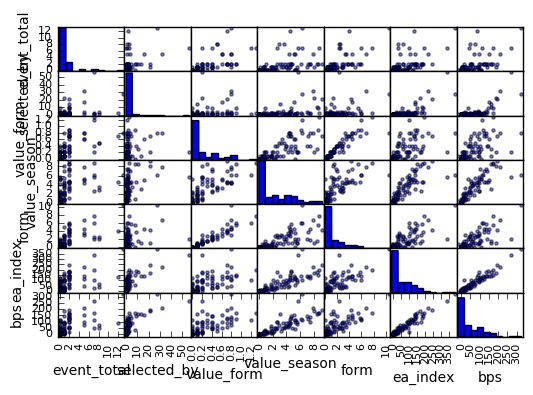

In [17]:
# Exploring Multi-collinearity between Variables
columns = ['event_total', 'selected_by', 'value_form', 'value_season', 'form','ea_index','bps']
pd.scatter_matrix(forwards_df[columns])

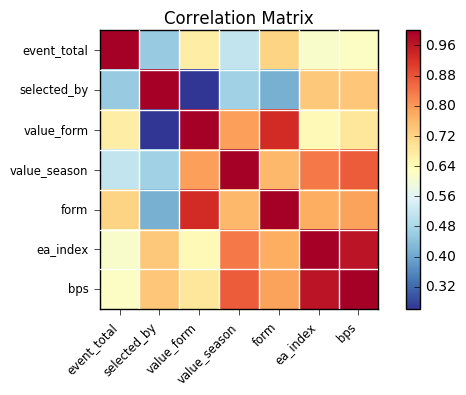

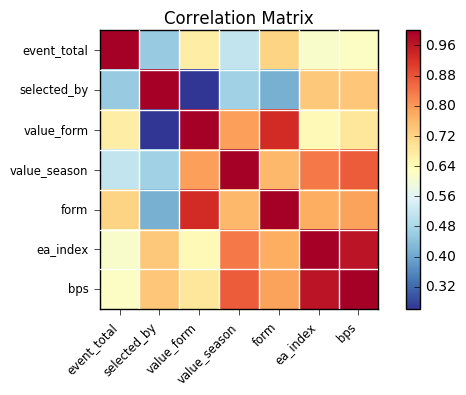

In [18]:
corr_matrix = np.corrcoef(forwards_df[columns].T)
sm.graphics.plot_corr(corr_matrix, xnames=columns)

In [19]:
# Its obvious from the Correlation Matrix that there is correlation between bps - ea_index & form - value_form
# Hence removing bps & value_from model and exploring
forwards_model = smf.ols(formula='event_total ~ selected_by + form + value_season + ea_index', data=forwards_df).fit()
forwards_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     32.33
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           2.16e-17
Time:                        19:20:27   Log-Likelihood:                -203.20
No. Observations:                 107   AIC:                             416.4
Df Residuals:                     102   BIC:                             429.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.1957      0.219      0.895      0.373        -0.238     0.629
selected_by      0.0702      0.036      1.943      0.055        -0.001     0.142
form             0.9007      0.139      6.479      0.000         0.625     1.176
value_season    -0.1434      0.124     -1.160      0.249        -0.389     0.102
ea_index         0.0002      0.006      0.036      0.972        -0.012     0.013
==============================================================================
Omnibus:                       80.299   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.863
Skew:                           2.475   Prob(JB):                    1.20e-121
Kurtosis:                      13.020   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Removing players who have played 0 minutes till now
forwards_df[forwards_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards.csv')
regular_forwards_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards.csv',index_col='web_name', na_filter=False)

In [21]:
# Running all features models for data set without fringe players
# This inculdes all the possible features, just to study the importance of each feature
all_features_model = smf.ols(formula='event_total ~ selected_by + total_points+ chance_of_playing_this_round + value_form + value_season + form + transfers_out_event+ transfers_in_event + points_per_game + minutes +ea_index + bps', data=regular_forwards_df).fit()
all_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     6.248
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           1.63e-07
Time:                        19:20:35   Log-Likelihood:                -141.46
No. Observations:                  73   AIC:                             314.9
Df Residuals:                      57   BIC:                             351.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               1.8518      0.687      2.694      0.009         0.475     3.228
chance_of_playing_this_round[T.0]      -0.4777      1.015     -0.471      0.640        -2.510     1.555
chance_of_playing_this_round[T.100]    -0.6925      0.623     -1.111      0.271        -1.941     0.556
chance_of_playing_this_round[T.50]     -0.1741      2.004     -0.087      0.931        -4.188     3.840
chance_of_playing_this_round[T.75]      0.0309      2.478      0.012      0.990        -4.932     4.994
selected_by                             0.0595      0.066      0.900      0.372        -0.073     0.192
total_points                           -0.0072      0.130     -0.056      0.956        -0.267     0.252
value_form                              4.8823      4.048      1.206      0.233        -3.224    12.989
value_season                           -0.2734      0.511     -0.534      0.595        -1.297     0.751
form                                   -0.0660      0.694     -0.095      0.924        -1.455     1.323
transfers_out_event                    -0.0001   5.96e-05     -1.830      0.073        -0.000  1.03e-05
transfers_in_event                   4.695e-05   4.99e-05      0.940      0.351     -5.31e-05     0.000
points_per_game                        -0.8260      0.511     -1.617      0.111        -1.849     0.197
minutes                                -0.0001      0.002     -0.056      0.955        -0.005     0.004
ea_index                                0.0103      0.014      0.718      0.476        -0.018     0.039
bps                                     0.0225      0.016      1.372      0.175        -0.010     0.055
==============================================================================
Omnibus:                       39.761   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.529
Skew:                           1.804   Prob(JB):                     3.30e-23
Kurtosis:                       7.585   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Creating two interaction terms based on what we learned from multi-collinearity matrix
regular_forwards_df['interaction_term1'] = regular_forwards_df.value_form * regular_forwards_df.form
regular_forwards_df['interaction_term2'] = regular_forwards_df.value_season * regular_forwards_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X = regular_forwards_df[cols]

Y = regular_forwards_df.event_total

lm = LinearRegression()


In [33]:
scores = cross_val_score(lm, X, Y, cv=5, scoring='mean_squared_error')

In [34]:
#Calculating Root Mean Squared Error
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Nov Model 2.0596

2.0596397807040048

In [35]:
players_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec1_players.csv',index_col='web_name', na_filter=False)

players_dec1_df[players_dec1_df.type_name=='Forward'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/forwardplayers_dec1.csv')

forwards_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/forwardplayers_dec1.csv',index_col='web_name', na_filter=False)

forwards_dec1_df[forwards_dec1_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards_dec1.csv')
regular_forwards_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards_dec1.csv',index_col='web_name', na_filter=False)


regular_forwards_dec1_df['interaction_term1'] = regular_forwards_dec1_df.value_form * regular_forwards_dec1_df.form
regular_forwards_dec1_df['interaction_term2'] = regular_forwards_dec1_df.value_season * regular_forwards_dec1_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X2 = regular_forwards_dec1_df[cols]

Y2 = regular_forwards_dec1_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X2, Y2, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec1 Model 1.6575


1.6575334620202438

In [36]:
# Creating the Same Model for Dec 4 Data Set

players_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec4_players.csv',index_col='web_name', na_filter=False)

players_dec4_df[players_df.type_name=='Forward'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/forwardplayers_dec4.csv')

forwards_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/forwardplayers_dec4.csv',index_col='web_name', na_filter=False)

forwards_dec4_df[forwards_dec4_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards_dec4.csv')
regular_forwards_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards_dec4.csv',index_col='web_name', na_filter=False)


regular_forwards_dec4_df['interaction_term1'] = regular_forwards_dec4_df.value_form * regular_forwards_dec4_df.form
regular_forwards_dec4_df['interaction_term2'] = regular_forwards_dec4_df.value_season * regular_forwards_dec4_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X3 = regular_forwards_dec4_df[cols]

Y3 = regular_forwards_dec4_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X3, Y3, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec4 Model 2.4378


2.4378927424054533

In [37]:
# Creating the Same Model for Dec 9 Data Set
players_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec9_players.csv',index_col='web_name', na_filter=False)

players_dec9_df[players_df.type_name=='Forward'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/forwardplayers_dec9.csv')

forwards_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/forwardplayers_dec9.csv',index_col='web_name', na_filter=False)

forwards_dec9_df[forwards_dec9_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards_dec9.csv')
regular_forwards_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_forwards_dec9.csv',index_col='web_name', na_filter=False)


regular_forwards_dec9_df['interaction_term1'] = regular_forwards_dec9_df.value_form * regular_forwards_dec9_df.form
regular_forwards_dec9_df['interaction_term2'] = regular_forwards_dec9_df.value_season * regular_forwards_dec9_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X4 = regular_forwards_dec9_df[cols]

Y4 = regular_forwards_dec9_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X4, Y4, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec9 Model 3.14755

3.147554508912886

In [40]:
# Training the model on the November Data Set & Testing for Dec 1, Dec4 & Dec 9 Data 

cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']
X = regular_forwards_df[cols]
Y = regular_forwards_df.event_total
lm = LinearRegression()
#rf = RandomForestClassifier(n_estimators=100)
#rf.fit(X,y)
lm.fit(X, Y) # fitting the linear regression on Nov values of X & Y

# Testing and Predicting for Dec 1 Data set
preds = lm.predict(X2) #X for Dec 1
# calc RMSE to compare preds vs y for Dec 1
rms = np.sqrt(mean_squared_error(y2, preds))
rms # RMSE for preds for Dec1 data set 2.3746


# Testing and Predicting for Dec 4 Data set
preds = lm.predict(X3) #X for Dec 4
# calc RMSE to compare preds vs y for Dec 4
rms = np.sqrt(mean_squared_error(Y3, preds))
rms # RMSE for preds for Dec4 data set 2.8351

# Testing and Predicting for Dec 9 Data set
preds = lm.predict(X4) #X for Dec 9
# calc RMSE to compare preds vs y for Dec 9
rms = np.sqrt(mean_squared_error(Y4, preds))
rms # RMSE for preds for Dec9 data set 3.0285

2.3746868654380027